# WINE REVIEWS

In [327]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.environ['PROJ_LIB'] = '/opt/anaconda3/share/proj'
import conda
from wordcloud import WordCloud, STOPWORDS
from mpl_toolkits.basemap import Basemap
import re

In [440]:
df = pd.read_csv('winereviews1.csv')

In [441]:
df = df.drop(columns=['Unnamed: 0'])

In [442]:
#df['country'].nunique()

In [443]:
#df.sort_values(['points','price'], ascending=False) #rank per score and price


Text(0, 0.5, 'Number of reviews')

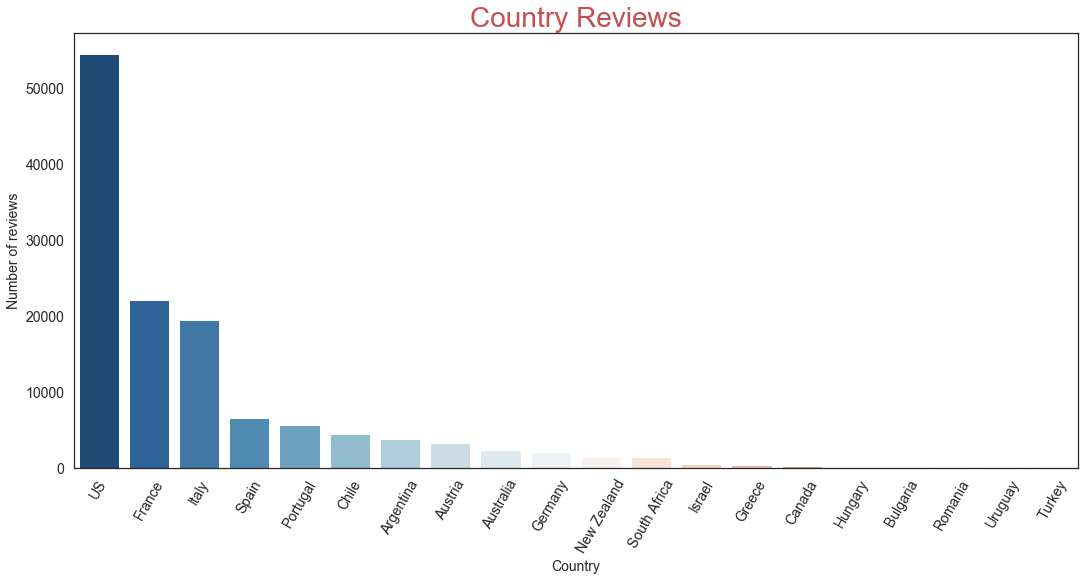

In [444]:
country_stat = df['country'].value_counts()
country_index = country_stat.index
country_values = country_stat.values
plt.figure(figsize=(18,8))
shape = sns.barplot(x=country_index[:20],y=country_values[:20],  palette='RdBu_r')
plt.xticks(rotation = 60, size = 14)
plt.yticks(size = 14)
plt.title("Country Reviews", size=28, c='r')
plt.xlabel("Country", fontsize=14)
plt.ylabel("Number of reviews", fontsize=14)

In [450]:
df.groupby(['country']).mean().sort_values('points', ascending=False) #points mean

points      price
country                                     
England                 91.581081  51.681159
India                   90.222222  13.333333
Austria                 90.101345  30.762772
Germany                 89.851732  42.257547
Canada                  89.369650  35.712598
Hungary                 89.191781  40.648276
China                   89.000000  18.000000
France                  88.845109  41.139120
Luxembourg              88.666667  23.333333
Australia               88.580507  35.437663
Switzerland             88.571429  85.285714
Morocco                 88.571429  19.500000
US                      88.563720  36.573464
Italy                   88.562231  39.663770
Israel                  88.471287  31.768916
New Zealand             88.303030  26.931785
Portugal                88.250220  26.218256
Turkey                  88.088889  24.633333
Slovenia                88.068966  24.812500
South Africa            88.056388  24.668987
Bulgaria                87.936170  14.645390
Georgia                 87.686047  19.321429
Lebanon                 87.685714  30.685714
Armenia                 87.500000  14.500000
Serbia                  87.500000  24.500000
Spain                   87.288337  28.215275
Greece                  87.283262  22.364425
Czech Republic          87.250000  24.250000
Croatia                 87.219178  25.450704
Moldova                 87.203390  16.745763
Cyprus                  87.181818  16.272727
Slovakia                87.000000  16.000000
Macedonia               86.833333  15.583333
Uruguay                 86.752294  26.403670
Argentina               86.710263  24.510117
Bosnia and Herzegovina  86.500000  12.500000
Chile                   86.493515  20.786458
Romania                 86.400000  15.241667
Mexico                  85.257143  26.785714
Brazil                  84.673077  23.765957
Ukraine                 84.071429   9.214286
Egypt                   84.000000        NaN
Peru                    83.562500  18.062500

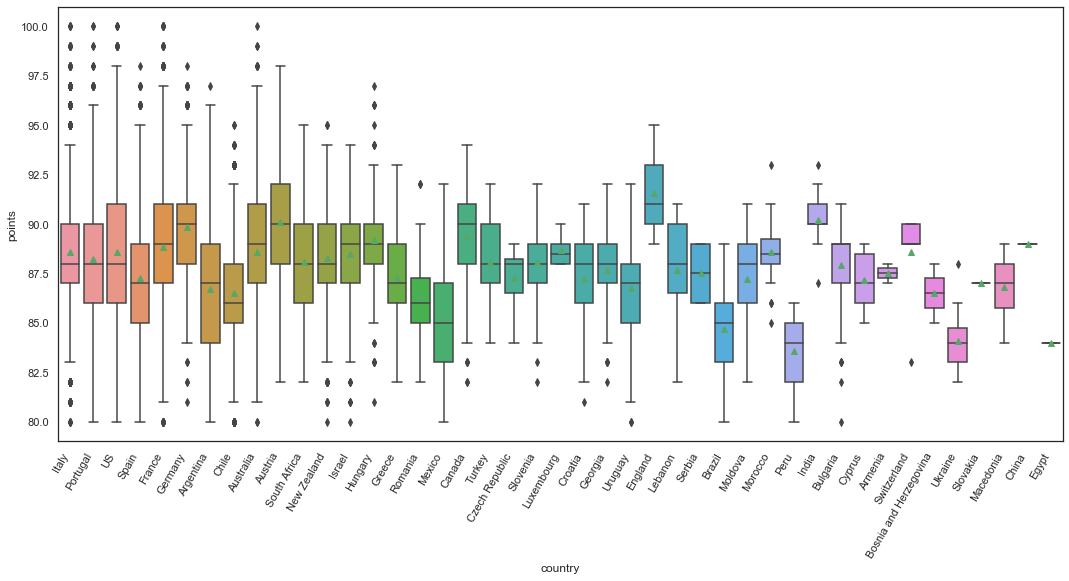

In [454]:
plt.figure(figsize=(18,8))
wine = sns.boxplot(x="country", y='points', data=df, showmeans=True)
plt.xticks(rotation = 60, ha='right')
plt.show()

Text(0, 0.5, 'Number of reviews')

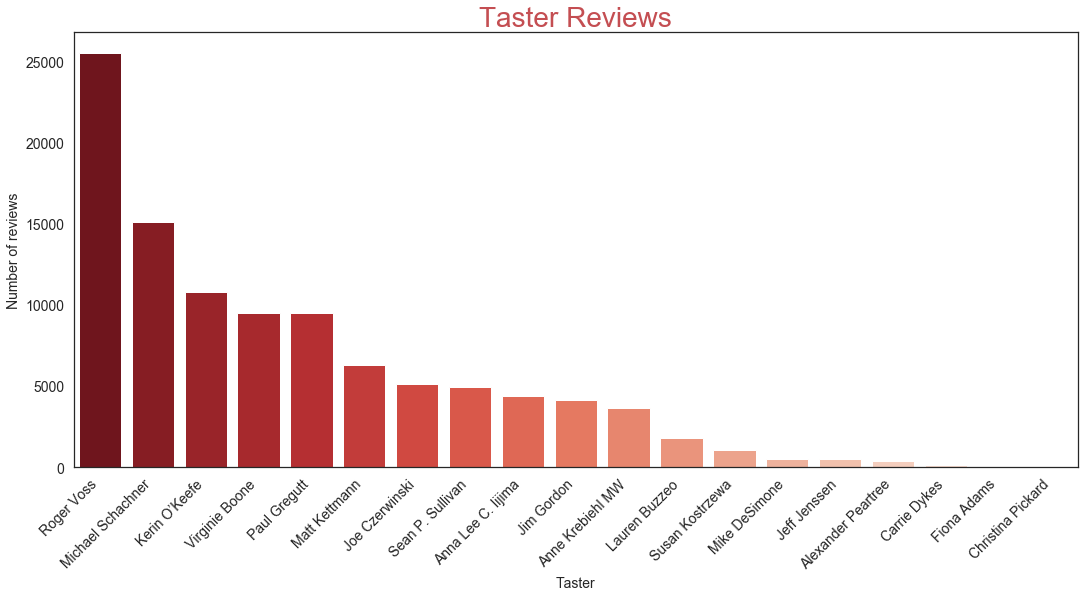

In [445]:
tester_stat = df['taster_name'].value_counts()
tester_index = tester_stat.index
tester_values = tester_stat.values
plt.figure(figsize=(18,8))
shape = sns.barplot(x=tester_index[:20],y=tester_values[:20],  palette='Reds_r')
plt.xticks(rotation = 45, size = 14, ha='right')
plt.yticks(size = 14)
plt.title("Taster Reviews", size=28, c='r')
plt.xlabel("Taster", fontsize=14)
plt.ylabel("Number of reviews", fontsize=14)

In [446]:
df.groupby(['taster_name']).mean().sort_values('points', ascending=False) #points mean

points      price
taster_name                             
Anne Krebiehl MW    90.562551  31.230135
Matt Kettmann       90.008686  38.642136
Virginie Boone      89.213379  46.621963
Mike DeSimone       89.101167  28.164683
Paul Gregutt        89.082564  33.644873
Kerin O’Keefe       88.867947  41.953413
Sean P. Sullivan    88.755739  34.085888
Roger Voss          88.708003  38.649960
Jim Gordon          88.626287  26.935507
Joe Czerwinski      88.536235  35.175579
Anna Lee C. Iijima  88.415629  29.790112
Jeff Jenssen        88.319756  22.234216
Christina Pickard   87.833333  29.333333
Lauren Buzzeo       87.739510  24.492703
Michael Schachner   86.907493  25.231155
Fiona Adams         86.888889  31.148148
Susan Kostrzewa     86.609217  22.908667
Carrie Dykes        86.395683  30.753623
Alexander Peartree  85.855422  29.053269

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


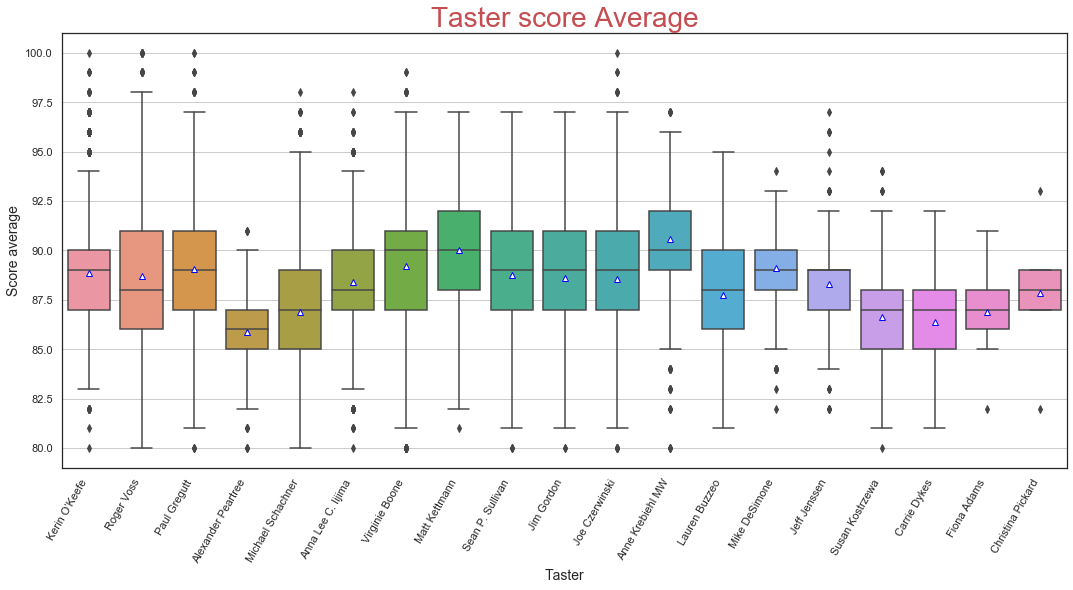

In [448]:
plt.figure(figsize=(18,8))
taster = sns.boxplot(x="taster_name", y='points', data=df, showmeans=True, meanprops={"markerfacecolor":"white", "markeredgecolor":"blue"})
axis = plt.axes()        
axis.yaxis.grid()
plt.xticks(rotation = 60, ha='right')
plt.title("Taster score Average", size=28, c='r')
plt.xlabel("Taster", fontsize=14)
plt.ylabel("Score average", fontsize=14)
plt.show()

points      price
country                                     
England                 91.581081  51.681159
India                   90.222222  13.333333
Austria                 90.101345  30.762772
Germany                 89.851732  42.257547
Canada                  89.369650  35.712598
Hungary                 89.191781  40.648276
China                   89.000000  18.000000
France                  88.845109  41.139120
Luxembourg              88.666667  23.333333
Australia               88.580507  35.437663
Switzerland             88.571429  85.285714
Morocco                 88.571429  19.500000
US                      88.563720  36.573464
Italy                   88.562231  39.663770
Israel                  88.471287  31.768916
New Zealand             88.303030  26.931785
Portugal                88.250220  26.218256
Turkey                  88.088889  24.633333
Slovenia                88.068966  24.812500
South Africa            88.056388  24.668987
Bulgaria                87.936170  14.645390
Georgia                 87.686047  19.321429
Lebanon                 87.685714  30.685714
Armenia                 87.500000  14.500000
Serbia                  87.500000  24.500000
Spain                   87.288337  28.215275
Greece                  87.283262  22.364425
Czech Republic          87.250000  24.250000
Croatia                 87.219178  25.450704
Moldova                 87.203390  16.745763
Cyprus                  87.181818  16.272727
Slovakia                87.000000  16.000000
Macedonia               86.833333  15.583333
Uruguay                 86.752294  26.403670
Argentina               86.710263  24.510117
Bosnia and Herzegovina  86.500000  12.500000
Chile                   86.493515  20.786458
Romania                 86.400000  15.241667
Mexico                  85.257143  26.785714
Brazil                  84.673077  23.765957
Ukraine                 84.071429   9.214286
Egypt                   84.000000        NaN
Peru                    83.562500  18.062500

In [259]:
df.groupby(['country']).mean().sort_values('price', ascending=False) #price mean

points      price
country                                     
Switzerland             88.571429  85.285714
England                 91.581081  51.681159
Germany                 89.851732  42.257547
France                  88.845109  41.139120
Hungary                 89.191781  40.648276
Italy                   88.562231  39.663770
US                      88.563720  36.573464
Canada                  89.369650  35.712598
Australia               88.580507  35.437663
Israel                  88.471287  31.768916
Austria                 90.101345  30.762772
Lebanon                 87.685714  30.685714
Spain                   87.288337  28.215275
New Zealand             88.303030  26.931785
Mexico                  85.257143  26.785714
Uruguay                 86.752294  26.403670
Portugal                88.250220  26.218256
Croatia                 87.219178  25.450704
Slovenia                88.068966  24.812500
South Africa            88.056388  24.668987
Turkey                  88.088889  24.633333
Argentina               86.710263  24.510117
Serbia                  87.500000  24.500000
Czech Republic          87.250000  24.250000
Brazil                  84.673077  23.765957
Luxembourg              88.666667  23.333333
Greece                  87.283262  22.364425
Chile                   86.493515  20.786458
Morocco                 88.571429  19.500000
Georgia                 87.686047  19.321429
Peru                    83.562500  18.062500
China                   89.000000  18.000000
Moldova                 87.203390  16.745763
Cyprus                  87.181818  16.272727
Slovakia                87.000000  16.000000
Macedonia               86.833333  15.583333
Romania                 86.400000  15.241667
Bulgaria                87.936170  14.645390
Armenia                 87.500000  14.500000
India                   90.222222  13.333333
Bosnia and Herzegovina  86.500000  12.500000
Ukraine                 84.071429   9.214286
Egypt                   84.000000        NaN

In [260]:
#df.drop_duplicates(subset = "description" , keep = 'first', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [261]:
df.sort_values(['points', 'price'], ascending=[0,1]) #rank per most points and lowest price

country                                        description  \
113929        US  In 2005 Charles Smith introduced three high-en...   
123545        US  Initially a rather subdued Frog; as if it has ...   
58352     France  This is a magnificently solid wine, initially ...   
45798         US  Tasted in a flight of great and famous Napa wi...   
7335       Italy  Thick as molasses and dark as caramelized brow...   
...          ...                                                ...   
122417        US  There's little going on in this wine beyond su...   
28569         US  Smells and tastes like caramel and stewed cher...   
103989        US  This suffers from major problems. It has all t...   
117025  Portugal  A curious sauerkraut perfume leads to a hard e...   
123541     Italy  This Valpolicella blend opens with an aged, br...   

                 designation  points  price    province  \
113929            Royal City     100   80.0  Washington   
123545           Bionic Frog     100   80.0  Washington   
58352                    NaN     100  150.0    Bordeaux   
45798                    NaN     100  200.0  California   
7335       Occhio di Pernice     100  210.0     Tuscany   
...                      ...     ...    ...         ...   
122417                 DeLuz      80   45.0  California   
28569               Scoprire      80   55.0  California   
103989  Miljenko's Old Vines      80   69.0  California   
117025                   NaN      80    NaN      Lisboa   
123541          Corte Antica      80    NaN      Veneto   

                               region_1          region_2   taster_name  \
113929             Columbia Valley (WA)   Columbia Valley  Paul Gregutt   
123545          Walla Walla Valley (WA)   Columbia Valley  Paul Gregutt   
58352                      Saint-Julien               NaN    Roger Voss   
45798                       Napa Valley              Napa           NaN   
7335         Vin Santo di Montepulciano               NaN           NaN   
...                                 ...               ...           ...   
122417                       California  California Other           NaN   
28569                        California  California Other           NaN   
103989                      Napa Valley              Napa           NaN   
117025                              NaN               NaN    Roger Voss   
123541  Valpolicella Classico Superiore               NaN           NaN   

       taster_twitter_handle  \
113929           @paulgwine    
123545           @paulgwine    
58352             @vossroger   
45798                    NaN   
7335                     NaN   
...                      ...   
122417                   NaN   
28569                    NaN   
103989                   NaN   
117025            @vossroger   
123541                   NaN   

                                                    title  \
113929  Charles Smith 2006 Royal City Syrah (Columbia ...   
123545  Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...   
58352          Château Léoville Barton 2010  Saint-Julien   
45798     Cardinale 2006 Cabernet Sauvignon (Napa Valley)   
7335    Avignonesi 1995 Occhio di Pernice  (Vin Santo ...   
...                                                   ...   
122417         Casa Tiene Vista NV DeLuz Red (California)   
28569            Millésimé 2005 Scoprire Red (California)   
103989  Grgich Hills 2004 Miljenko's Old Vines Zinfand...   
117025     Quinta do Pinto 2008 Touriga Nacional (Lisboa)   
123541  Cantine Benedetti 2008 Corte Antica  (Valpolic...   

                              variety                   winery  
113929                          Syrah            Charles Smith  
123545                          Syrah                   Cayuse  
58352        Bordeaux-style Red Blend  Château Léoville Barton  
45798              Cabernet Sauvignon                Cardinale  
7335                 Prugnolo Gentile               Avignonesi  
...                               ... 

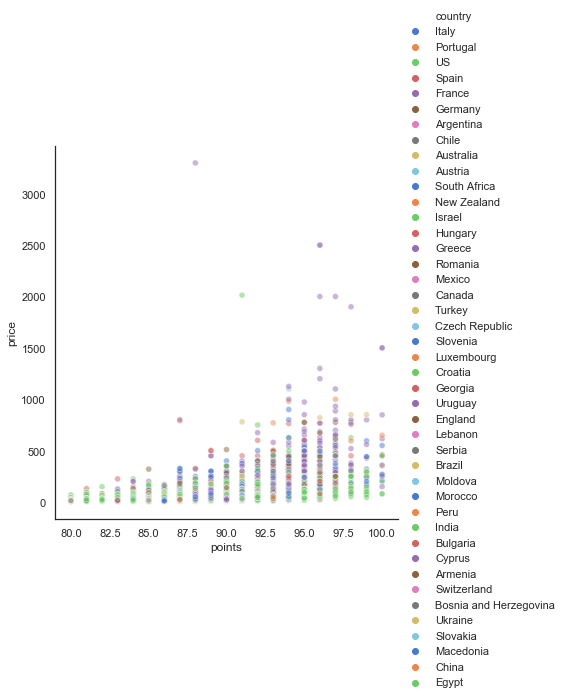

In [262]:
sns.set(style="white")
sns.relplot(x="points", y="price", hue="country",
            alpha=.5, palette="muted",
            height=6, data=df)
plt.show()


In [306]:
#df['year'] = df.title.str.extract('(\d+4)') #extract year from string in 'title'column
#df['year'] = pd.to_numeric(df['year'], errors='coerce')
#df = df.dropna(subset=['year'])
#df['year'] = df['year'].astype(int)
#df = df.loc[df['year'] > 1900]